In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 복잡한 통계 처리를 위한 라이브러리
# pip install scipy
from scipy import stats

### 01 1변량 데이터 통계량
- 변수가 하나인 것

In [3]:
# 데이터를 불러온다.
fish_length_df = pd.read_csv('data/3-4-1-fish-length.csv')
fish_length_df

,length
0,2
1,3
2,3
3,4
4,4
5,4
6,4
7,5
8,5
9,6


In [4]:
# ndarray로 추출한다.
fish_length = fish_length_df['length'].values
fish_length

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

### 표본 크기
- 분석을 위해서 사용하는 데이터 표본의 행의 개수
- 모집단 전체를 가지고 분석을 할 때는 모집단의 크기가 된다.

In [5]:
# ndarray
# 행렬이 가진 전체 데이터의 개수
a1 = len(fish_length)
# 행과 열의 수를 각각 구한다.
a2 = fish_length.shape

# 데이터 프레임
# 데이터 프레임이 관리하는 데이터의 개수
a3 = len(fish_length_df)
# 데이터 프레임이 관리하는 데이터의 개수
a4 = fish_length_df.size
# 행과 열의 수가 된다.
a5 = fish_length_df.shape

# 현재 데이터는 1변량 데이터이기 때문에 컬럼이 하나밖에 없는 데이터이다.
# 행의 개수를 구하는 것과 전체 데이터의 개수를 구하는 것이 동일한 값으로 나온다.
print(a1, a2[0], a3, a4, a5[0])

10 10 10 10 10


In [6]:
# 데이터 프레임의 컬럼을 지정하여 count함수를 사용하면
# 결측치를 제외한 데이터의 개수를 구할 수 있다.
fish_length_df['length'].count()

np.int64(10)

In [7]:
# 합계를 구하는 함수
# 결측치를 제외한 총합을 구한다.
# ndarray
a1 = np.sum(fish_length)
a2 = fish_length.sum()
# data frame
a3 = fish_length_df['length'].sum()

print(a1, a2, a3)

# 평균을 구하는 함수
# 결측치 제외한 데이터의 평균을 구한다
# ndarray
a1 = np.mean(fish_length)
a2 = fish_length.mean()
# data frame
a3 = fish_length_df['length'].mean()

print(a1, a2, a3)

40 40 40
4.0 4.0 4.0


### 02 표본 분산
- 분산 : 평균값으로 부터 데이터들이 얼마나 떨어져 있는가를 의미하는 값이다.
- 분산이 낮으면 대부분의 값들이 평균값과 가까이 있다고 평가되기 때문에 평균을 대표값으로 사용할 수 있다.
- 표본으로 부터 구한 분산을 표본 분산이라고 부른다.
- 모집단으로 부터 구한 분산은 모집단 분산이라고 부른다.
- 또한 표본 분산은 표본이 모집단을 대표하는 표본인지 평가하는 수단 중에 하나로 사용 되어지기도 한다.
- 표본 분산은 반드시 모집단 분산과 매우 가까운 값으로 계산되어야 한다.

In [8]:
# 표본 분산을 공식대로 구한다.
s2 = np.sum((fish_length - np.mean(fish_length)) ** 2) / len(fish_length)
s2

np.float64(1.2)

In [9]:
# 평균
a1 = np.mean(fish_length)
# 각 원소의 값을 평균으로 빼준다.
a2 = fish_length - a1
# 뺀 값의 제곱을 구한다.
a3 = a2 ** 2
# 총합을 구한다.
a4 = np.sum(a3)
# 표본의 개수로 나눠준다.
s2 = a4 / len(fish_length)
s2

np.float64(1.2)

In [10]:
# 분산을 구하는 함수
# ddof : 0이면 표본 분산을 구하고 1이면 불편 분산을 구한다.
# numpy의 경우 기본이 0이고 pandas는 기본이 1이다.
# 만약 이게 헷갈린다면 무조건 ddof를 설정해주세요~
a1 = np.var(fish_length, ddof=0)
a2 = fish_length.var(ddof=0)
a3 = fish_length_df['length'].var(ddof=0)

display(a1, a2, a3)

np.float64(1.2)

np.float64(1.2)

np.float64(1.2)

### 03 불편 분산

In [11]:
# 불편 분산은 표본 분산을 구하는 공식에서 표본의 크기로 나누는 것이 아닌 표본의 크기에서 1을 뺀 수치로 나눠준다.
s2 = np.sum((fish_length - np.mean(fish_length)) ** 2) / (len(fish_length) - 1)
s2

np.float64(1.3333333333333333)

In [12]:
# ddof 에 1을 설정하면 불편분산을 구한다.
a1 = np.var(fish_length, ddof=1)
a2 = fish_length.var(ddof=1)
a3 = fish_length_df['length'].var(ddof=1)

print(a1, a2, a3)

1.3333333333333333 1.3333333333333333 1.3333333333333333


### 04 표준 편차
- 표본분산은 각 데이터를 평균으로 뺀 다음 제곱하여 합산하고 표본의 개수로 나눈 것이다.
- 데이터와 평균에 대한 뺄셈을 하게 되면 음수가 나올 수 있기 때문에 제곱한 것을 합산하게 된다 (평균은 실제 값보다 작을 수도 있고 클 수도 있다는 특징 때문이다.)
- 하지만 제곱한 것을 합산하기 때문에 평균과 실제 값의 오차 평균으로 보기는 다소 무리가 있다.
- 이에 표본분산에 제곱근을 씌운 것을 구해 전체적은 오차를 가늠하는데 사용할 수 있다.
- 이를 표준 편차라고 부른다.

In [13]:
# 위에서 구한 분산
s1 = np.var(fish_length, ddof=0)
s1

np.float64(1.2)

In [14]:
# 표준 편차를 구한다.
s = np.sqrt(s1)
s

np.float64(1.0954451150103321)

In [15]:
# 표준편차를 구하는 함수
# ddof : 0 이면 표본 분산을 통해 표준 편차를 구하고 1이면 불편 분산을 통해 표준 편차를 구한다.
a1 = np.std(fish_length, ddof=0)
a2 = fish_length.std(ddof=0)
a3 = fish_length_df['length'].std(ddof=0)

print(a1, a2, a3)

1.0954451150103321 1.0954451150103321 1.0954451150103321


In [16]:
# 표준편차를 구하는 함수
# ddof : 0 이면 표본 분산을 통해 표준 편차를 구하고 1이면 불편 분산을 통해 표준 편차를 구한다.
a1 = np.std(fish_length, ddof=1)
a2 = fish_length.std(ddof=1)
a3 = fish_length_df['length'].std(ddof=1)

print(a1, a2, a3)

1.1547005383792515 1.1547005383792515 1.1547005383792515


### 05 변동계수
- 분산은 데이터들이 평균에 비해 얼마나 떨어져 있는지를 평가하는 수치이다.
- 표준 편차는 분산의 제곱근을 씌우서 계산한 수치이다.
- 즉, 둘 다 데이터들이 평균으로 부터 얼마나 떨어져 있는지를 평가하는 수치로 사용할 수 있다.
- 허나 이 편차는 실제 데이터의 값에 따라 크게 느껴질 수도 있고 작게 느껴질 수도 있다(상대적이다.)
- 값의 범위가 1억에서 10억인 경우 편차가 5라면 작게 느껴질 수 있다.
- 값의 범위가 1에서 10인경우 편차가 5라면 크게 느껴질 수 있다.
- 표준편차를 값의 평균으로 나눈 것을 변동 계수라고 부른다.
- 같은 표준 편차라고 하더라도 분모가 커지면(값의 범위가 크다면) 나눈 값은 작아진다.
- 같은 표준 편차라고 하더라도 분모가 작으면(값의 범위가 작다먄) 나눈 값은 커진다.
- 변동 계수가 작을 수록 실제 데이터와 평균을 비교했을 때 편차가 작다라고 평가할 수 있다.
- 변동 계수는 표준 편차를 데이터의 평균으로 나누는 연산을 통해 구한다. 이에 평균이 0이면 변동 계수를 구할 수 없다.

In [17]:
# 변동계수 = 표준편차 / 평균
# 표준 편차
s = np.std(fish_length, ddof=0)
# 평균
m = fish_length.mean()
# 변동계수
cv = s / m
cv

np.float64(0.27386127875258304)

In [18]:
# scipy의 stats 모듈안에 변동계수를 구하는 함수가 있다.
# ddof : 0이면 변동계수를 구하기한 표준 편차를 구하기 위한 분산은 표본 분산을 사용한다.
# 1이면 변동계수를 구하기한 표준 편차를 구하기 위한 분산은 불편 분산을 사용한다.
stats.variation(fish_length, ddof=0)

np.float64(0.27386127875258304)

In [19]:
# 겨울 기온과 여름 기온
winter = np.array([1, 1, 1, 2, 2, 2])
summer = np.array([29, 29, 29, 30, 30, 30])

In [22]:
# 표준 편차
a1 = np.std(winter, ddof=0)
a2 = np.std(summer, ddof=0)

print(f'겨울 표준 편차 : {a1}')
print(f'여름 표준 편차 : {a2}')

겨울 표준 편차 : 0.5
여름 표준 편차 : 0.5


In [23]:
# 변동 계수
a1 = stats.variation(winter, ddof=0)
a2 = stats.variation(summer, ddof=0)

print(f'겨울 변동 계수 : {a1}')
print(f'여름 변동 계수 : {a2}')

겨울 변동 계수 : 0.3333333333333333
여름 변동 계수 : 0.01694915254237288


### 06 표준화
- 1변량 데이터 (컬럼 하나)의 데이터를 평균은 0으로 표준편차는 1로 변환하는 작업을 의미한다.
- 여러 컬럼들의 데이터를 서로 비교하고자 할 때 어떤 컬럼은 값의 범위가 작고 어떤 컬럼은 값의 범위가 클 경우 같이 비교하는 것이 불편할 수도 있다.
- 모든 컬럼들의 값의 범위를 비슷한 수준으로 맞추는 것을 표준화라고 부른다.
- 데이터 분석때는 각 컬럼의 데이터를 서로 비교할 때 데이터의 패턴 비교를 좀더 쉽고 용이하게 할 수 있다.
- 인공지능에서는 학습을 정상화 하거나 학습의 횟수를 줄이는 효과를 얻을 수 있다.
- 인공지능 분야에서는 여러 가지 표준화 방법을 제공하고 있는데 이는 인공지능 알고리즘의 학습 원리 때문에 제공되는 것들이다.
- 통계학에서 표준화는 표준 편차와 평균을 이용한 표준화를 의미한다(Standard Scaler)

In [24]:
# 각 데이터를 평균으로 빼고 표준 편차로 나눠준다.
x_bar = np.mean(fish_length)
s = np.std(fish_length, ddof=0)
z = (fish_length - x_bar) / s
z

array([-1.82574186, -0.91287093, -0.91287093,  0.        ,  0.        ,
        0.        ,  0.        ,  0.91287093,  0.91287093,  1.82574186])

In [25]:
# 표준화된 결과는 표준 편차가 1과 가까워야 한다.
np.std(z)

np.float64(1.0)

In [26]:
# 머신러닝을 위한 라이브러리들이 표준화를 위한 다양한 것들을 제공하고 있다.
# scipy의 state 모듈에서도 표준편차와 평균을 이용한 표준화 함수를 제공하고 있다.
stats.zscore(fish_length, ddof=0)

array([-1.82574186, -0.91287093, -0.91287093,  0.        ,  0.        ,
        0.        ,  0.        ,  0.91287093,  0.91287093,  1.82574186])

### 07 최소값과 최대값

In [27]:
# numpy 에서의 최소값
a1 = np.min(fish_length)
a2 = np.amin(fish_length)
a3 = fish_length.min()

display(a1, a2, a3)

np.int64(2)

np.int64(2)

np.int64(2)

In [28]:
# numpy 에서의 최대값
a1 = np.max(fish_length)
a2 = np.amax(fish_length)
a3 = fish_length.max()

display(a1, a2, a3)

np.int64(6)

np.int64(6)

np.int64(6)

- numpy에 보면 최소를 구하는 함수의 이름이 min, amin 이고 최대를 구하는 함수의 이름이 max, amax 이렇게 제공된다.
- 이 둘은 차이가 없다.
- 내부적으로 min, max 함수가 amin, amax를 호출하고 있다.
- 초창기 numpy가 만들어졌을 때 최소와 최대를 구하는 함수의 이름인 min, max가 파이썬에서 제공하고 있는 min, max 함수와 동일하기 때문에 사용자들이 혼돈을 느낄 수 있다고 편단해서 array min, array max를 의미한 amin, amax 라는 이름으로 제공되었다.
- 하지만 개발자들이 그냥 min, max를 원하는 사람들이 많아져서 min, max를 추가로 제공한 것이다.

In [29]:
# pandas를 통한 최소 최대
a1 = fish_length_df['length'].min()
a2 = fish_length_df['length'].max()

print(a1, a2)

2 6


### 08 중앙값
- 전체 데이터에서 중간 위치와 가장 가까이 있는 값
- 평균을 대표값으로 사용할 수 없을 때 중앙값을 대표값으로 사용한다.

In [30]:
# 중앙값
# 가운데 위치와 가장 가까운 값이 중앙값이 된다.
a1 = np.median(fish_length)
# a2 = fish_length.median()
a3 = fish_length_df['length'].median()

print(a1, a3)

4.0 4.0


In [31]:
# 평균값과 중앙값에 대한 이야기...
# 물고기 몸 길이에 대한 평균
a1 = np.mean(fish_length)
# 물고기 몸 길이에 대한 중간값
a2 = np.median(fish_length)

# 출력
print(a1, a2)

4.0 4.0


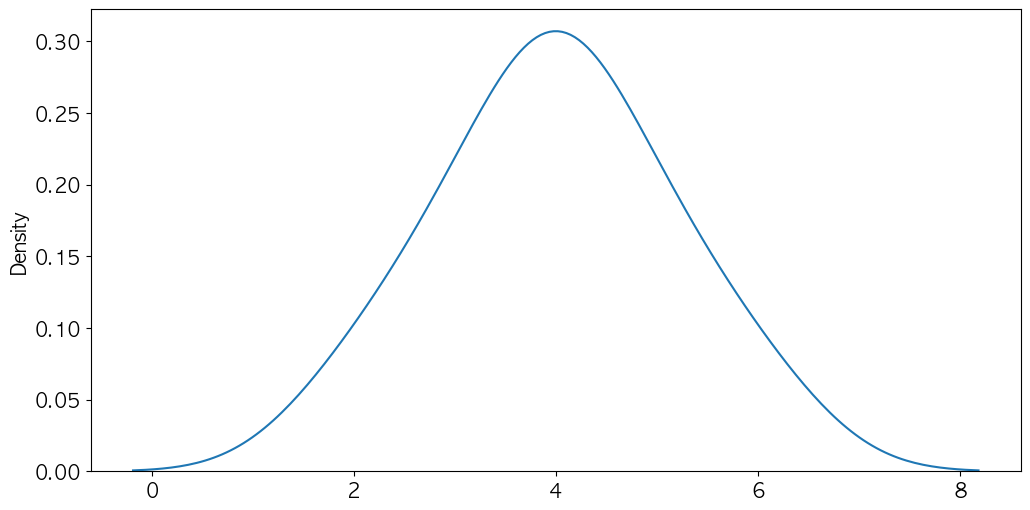

In [32]:
# 위의 물고기 몸길이 데이터는 중앙을 기준으로 편형되지 않았기 때문에
# 중앙값과 평균이 똑같이 나온다.
sns.kdeplot(fish_length)
plt.show()

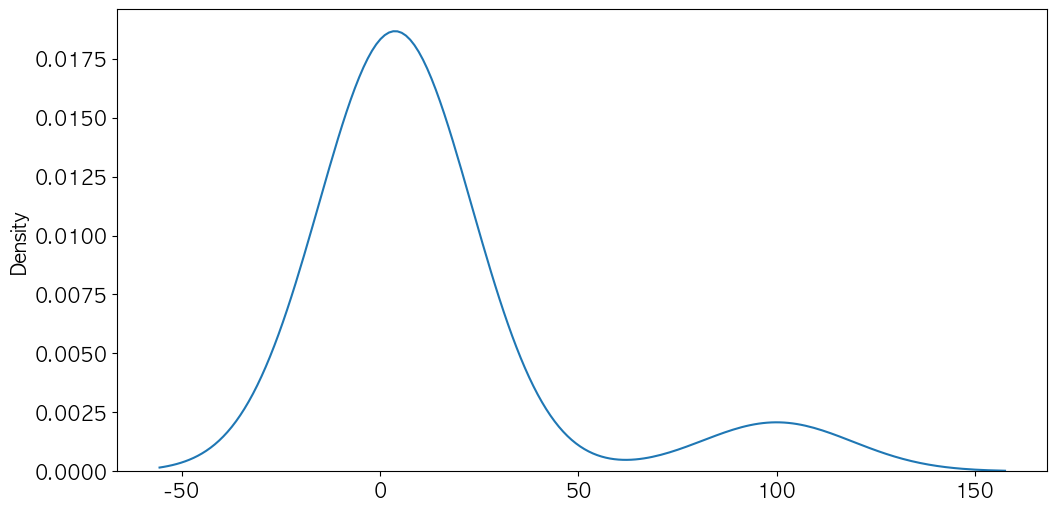

In [33]:
fish_length2 = [2, 3, 3, 4, 4, 4, 4, 5, 5, 100]
sns.kdeplot(fish_length2)
plt.show()

In [34]:
# 평균
a1 = np.mean(fish_length2)
# 중앙값
a2 = np.median(fish_length2)

print(a1, a2)

13.4 4.0


- 만약 불균형이 심하거나 굉장히 크거나 굉장히 작은 값이 존재한다면 이를 통해 구한 평균은 중앙값과 매우 다를 수 있다.
- 평균은 아주 큰값 혹은 아주 작은값에 영향을 받아 끌려갈 수 있기 때문에 평균을 대표값으로 사용하지 못하는 경우가 발생할 수 있다.
- 이 때는 대표값으로 중앙값을 사용해야 한다.
- 평균과 중앙값을 구해보고 차이가 너무 크다면 데이터를 확인해보고 편향되어 있거나 너무 큰거나 너무 작은 값들이 존재한다면 극단치를 제외한 평균과 중앙값을 구해 비교해 보거나 중앙값을 대표값으로 사용해야 한다.

### 09 사분위수
- 25% 50% 75% 위치에 해당하는 값
- 25% 위치의 값을 1사분위 점(수), 50% 위치의 값은 2사분위점(수), 75% 위치의 값은 3사분위점(수)이라고 부른다.

In [35]:
# quantile 함수를 통해 사분위 수를 구할 수 있다.
print(fish_length)
# 1사분위수 (25%)
a1 = np.quantile(fish_length, q=0.25)
# 2사분위수 (50%)
a2 = np.quantile(fish_length, q=0.5)
# 3사분위수 (75%)
a3 = np.quantile(fish_length, q=0.75)

print(a1, a2, a3)

[2 3 3 4 4 4 4 5 5 6]
3.25 4.0 4.75


In [36]:
a1 = fish_length_df['length'].quantile(q=0.25)
a2 = fish_length_df['length'].quantile(q=0.5)
a3 = fish_length_df['length'].quantile(q=0.75)

print(a1, a2, a3)

3.25 4.0 4.75


In [37]:
# 표본의 크기가 홀수인 경우
fish_length3 = np.arange(0, 101, 1)
display(len(fish_length3))

a1 = np.quantile(fish_length3, q=0.25)
a2 = np.quantile(fish_length3, q=0.5)
a3 = np.quantile(fish_length3, q=0.75)

print(a1, a2, a3)

101

25.0 50.0 75.0


In [38]:
# 표본의 크기가 짝수인 경우
fish_length3 = np.arange(0, 100, 1)
display(len(fish_length3))

a1 = np.quantile(fish_length3, q=0.25)
a2 = np.quantile(fish_length3, q=0.5)
a3 = np.quantile(fish_length3, q=0.75)

print(a1, a2, a3)

100

24.75 49.5 74.25


### 10 최빈값
- 데이터의 빈도가 가장 높은 값

In [39]:
# 도수 분포를 통해 확인이 가능하다.
# 도수 분포를 구하게 되면 내림 차순으로 정렬되기 때문에 가장 위에 있는 것이 가장
# 많이 존재하는 값이 된다.
fish_length_df['length'].value_counts()

length
4    4
3    2
5    2
2    1
6    1
Name: count, dtype: int64

In [40]:
# scipy의 stats 모듈에 최값을 구하는 함수가 있다.
value, count = stats.mode(fish_length)
print(f'{value}가 총 {count}번 나옵니다.')

4가 총 4번 나옵니다.


In [41]:
# 만약 최빈값이 여러개라면 가장 작은 값을 가지고 온다.
a1 = np.array([1, 1, 1, 1, 2, 3, 3, 3, 3])
value, count = stats.mode(a1)
print(f'{value}가 총 {count}번 나옵니다.')

1가 총 4번 나옵니다.


In [42]:
# pandas의 describe 함수를 쓰면 다음같은 값을 한번에 확인할 수 있다.
# 표본크기, 평균, 표준 편차, 최소값, 1사분위수, 중앙값(2사분위수), 3사분위수, 최대값
fish_length_df.describe()

,length
count,10.000000
mean,4.000000
std,1.154701
min,2.000000
25%,3.250000
50%,4.000000
75%,4.750000
max,6.000000
